In [1]:
import numpy as np
import pandas as pd

import os
import zipfile
import shutil
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


In [2]:
with zipfile.ZipFile('images.zip', 'r') as zip_ref:
    zip_ref.extractall()

Se trabajará con una base de datos que reune 100 imágenes de leones y chitas para cada uno, es decir, 200 imágenes en total a color. Debido al reducido número de datos, es necesario hacer DataAugmentation para tener suficientes datos y desarrollar un modelo más preciso.

In [3]:
tamaño = (150,150)
batch = 128
epochs = 50
directorio = '/content/images/'

# Data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.1
)


# **Modelo sin filtros**

In [4]:
# Carga de datos de entrenamiento
image_generator_NF = datagen.flow_from_directory(
    directorio,
    target_size=tamaño,
    batch_size=batch,
    class_mode='binary')

# Carga de datos de validacion
validation_generator_NF = datagen.flow_from_directory(
    directorio,
    target_size=tamaño,
    batch_size=batch,
    class_mode='binary',
    subset='validation'
)

Found 200 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [5]:
# Modelo sin filtros
modelo_simple = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
modelo_simple.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

modelo_simple.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history_simple = modelo_simple.fit(
    image_generator_NF,
    epochs=epochs,
    validation_data=validation_generator_NF
)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 7s/step - accuracy: 0.5219 - loss: 1.4694 - val_accuracy: 0.5000 - val_loss: 2.3530
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.5000 - loss: 2.0767 - val_accuracy: 0.5000 - val_loss: 0.7577
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.5059 - loss: 0.7265 - val_accuracy: 0.5000 - val_loss: 0.6940
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 6s/step - accuracy: 0.5093 - loss: 0.7027 - val_accuracy: 0.5500 - val_loss: 0.6869
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 6s/step - accuracy: 0.5167 - loss: 0.6894 - val_accuracy: 0.5500 - val_loss: 0.6890
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 6s/step - accuracy: 0.4820 - loss: 0.6942 - val_accuracy: 0.7000 - val_loss: 0.6779
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.5486 - loss: 0.6923 - val_accuracy: 0.5000 - val_loss: 0.6888
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 6s/step - accuracy: 0.5246 - loss: 0.6874 - val_accuracy: 0.6000 - val_loss: 0.6715
Epoch 9/

# **Modelo con filtros**

Aplicar filtro de escala de grises ayudará a distinguir los patrones entre imágenes debido al pelaje de los animales en cuestión. Por otro lado, la implementación de un filtro sobel podría ayudar a identificar la estructura ósea del animal siendo los leones más anchos y grandes que los chitas.

In [9]:
# Aplicación de filtros
def aplicar_filtro(imagen):
  # Escala de grises
  gris = cv2.cvtColor(imagen, cv2.COLOR_RGB2GRAY)

  # Se junta con el filtro sobel (ejes)
  sx = cv2.Sobel(gris, cv2.CV_64F, 1, 0, ksize=5)
  sy = cv2.Sobel(gris, cv2.CV_64F, 0, 1, ksize=5)
  xy = cv2.addWeighted(sx, 0.5, sy, 0.5, 0) # gamma(sesgo)=0

  # Reescala los valores obtenidos del filtro sobel
  xy = cv2.convertScaleAbs(xy)

  return xy

In [10]:
# Copia del dataset original para aplicar filtros
directorio_copia = 'images2'
shutil.copytree(directorio, directorio_copia, dirs_exist_ok=True)

'images2'

In [11]:
# Lectura de archivos
for carpeta in os.listdir(directorio_copia):
  ruta_carpeta = os.path.join(directorio, carpeta)

  for imagen in os.listdir(ruta_carpeta):
    ruta_imagen = os.path.join(ruta_carpeta, imagen)

    imagen_jpg = cv2.imread(ruta_imagen) # Lee la imagen
    imagen_filtro = aplicar_filtro(imagen_jpg) # Aplica el filtro
    cv2.imwrite(ruta_imagen, imagen_filtro) # Reescribe la imagen

In [12]:
# Carga de datos de entrenamiento
image_generator_WF = datagen.flow_from_directory(
    directorio_copia,
    target_size=tamaño,
    batch_size=batch,
    class_mode='binary')

# Carga de datos de validacion
validation_generator_WF = datagen.flow_from_directory(
    directorio_copia,
    target_size=tamaño,
    batch_size=batch,
    class_mode='binary',
    subset='validation'
)

Found 200 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [13]:
modelo_filtro = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

In [14]:
modelo_filtro.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

modelo_filtro.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history_filtro = modelo_filtro.fit(
    image_generator_WF,
    epochs=epochs,
    validation_data=validation_generator_WF
)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 7s/step - accuracy: 0.4661 - loss: 1.6504 - val_accuracy: 0.5000 - val_loss: 0.9256
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 6s/step - accuracy: 0.5185 - loss: 0.9029 - val_accuracy: 0.5000 - val_loss: 0.7456
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 6s/step - accuracy: 0.5054 - loss: 0.7214 - val_accuracy: 0.5000 - val_loss: 0.6852
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 6s/step - accuracy: 0.4756 - loss: 0.6965 - val_accuracy: 0.5000 - val_loss: 0.6835
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 6s/step - accuracy: 0.5139 - loss: 0.6904 - val_accuracy: 0.5000 - val_loss: 0.6815
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.5019 - loss: 0.6905 - val_accuracy: 0.5000 - val_loss: 0.6788
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.5111 - loss: 0.6893 - val_accuracy: 0.5500 - val_loss: 0.6790
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 6s/step - accuracy: 0.5507 - loss: 0.6896 - val_accuracy: 0.7000 - val_loss: 0.6732
Epoch 9/

# **Comparación de modelos**

<function matplotlib.pyplot.show(close=None, block=None)>

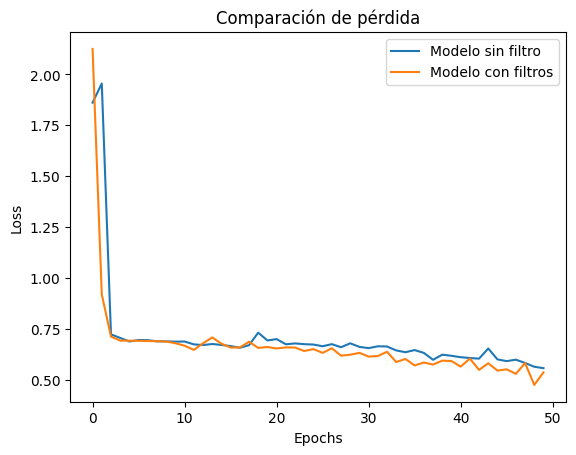

In [16]:
plt.plot(history_simple.history['loss'], label='Modelo sin filtro')
plt.plot(history_filtro.history['loss'], label='Modelo con filtros')
plt.title('Comparación de pérdida')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

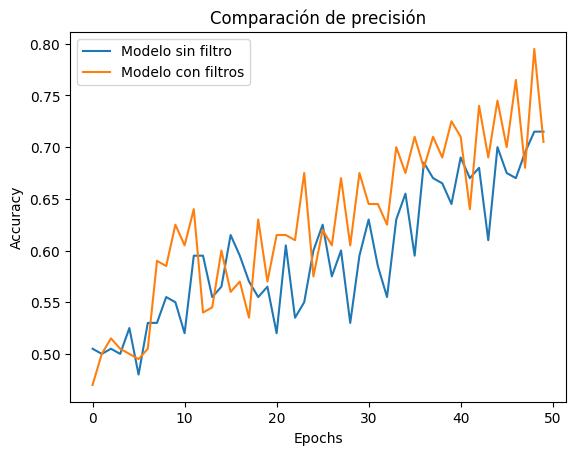

In [17]:
plt.plot(history_simple.history['accuracy'], label='Modelo sin filtro')
plt.plot(history_filtro.history['accuracy'], label='Modelo con filtros')
plt.title('Comparación de precisión')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show

En general observamos que el modelo con filtros se desenvuelve mejor que el modelo con filtros, lo que indica que generaliza y aprende mejor a comparación del otro modelo. La inestabilidad en las gráficas puede deberse a la cantidad limitada de datos con la que se cuenta para desarrollar el modelo; pese a esta limitación, el modelo con filtros aprende mejor y se concluye que gracias a los filtros se resaltan características importantes de los animales en cuestión.
La variedad en las imágenes también ayuda puesto que no son solo imágenes genéricas de leones y chitas, sino que en ellas se pueden observar estatuas, personas, etc. lo que podría ser una buena base para el entrenamiento de la red.